In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)
n_samples=1000
bedrooms=np.random.randint(1,4,n_samples)
bathrooms=np.random.randint(1,3,n_samples)
location=np.random.randint(1,3,n_samples)
floors=np.random.randint(1,4,n_samples)
sq_area=np.random.randint(1000,3500,n_samples)
price=30000+(5000*bedrooms+4500*bathrooms+7500*location+10000*floors+1500*sq_area)

In [3]:
X=np.column_stack((bedrooms,bathrooms,location,floors,sq_area))
y=price

x_mean=np.mean(X,axis=0)
x_std=np.std(X,axis=0)
norm_value=(X-x_mean)/x_std

In [4]:
norm_val_bias=np.column_stack((np.ones(n_samples),norm_value))

norm_eq_x=np.dot(norm_val_bias.T,norm_val_bias)
norm_eq_y=np.dot(norm_val_bias.T,y)
cofficients=np.linalg.solve(norm_eq_x,norm_eq_y)

In [5]:
def predict(X,cofficients):
    norm_value=(X-x_mean)/x_std
    norm_val_bias=np.column_stack((np.ones(X.shape[0]), norm_value))
    return np.dot(norm_val_bias,cofficients)

y_predict=predict(X,cofficients)
mse=np.mean((y-y_predict)**2)
r_sqrd=1-(np.sum((y-y_predict)**2)/np.sum((y-np.mean(y))**2))
print("MSE",mse)
print("R squared",r_sqrd)

('MSE', 8.27083627280567e-19)
('R squared', 1.0)


('Predcited price for new data', 3057000.0000000014)


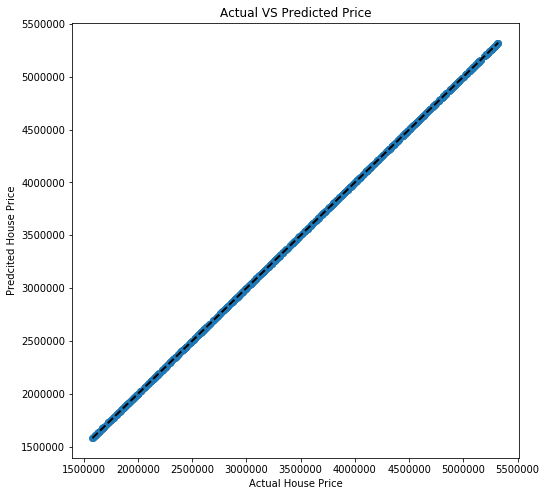

In [11]:
new_house_data=np.array([[1,1,1,1,2000]])
predict_price=predict(new_house_data,cofficients)
print("Predcited price for new data",predict_price[0])

fig=plt.figure(figsize=(8,8))
plt.scatter(y,y_predict)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=2)
plt.xlabel('Actual House Price')
plt.ylabel('Predcited House Price')
plt.title('Actual VS Predicted Price')
plt.show()